<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/WordFreq_MobyDick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WORD FREQUENCY WITH MOBY DICK**



In this workspace, We'll scrape the novel Moby Dick from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python `requests` package. We'll extract words from this web data using `BeautifulSoup` before analyzing the distribution of words using the Natural Language ToolKit (`nltk`) and `Counter`.

The Data Science pipeline We'll build in this workspace can be used to visualize the word frequency distributions of any novel you can find on Project Gutenberg.


> Note: This project is adapted from guided projects on DataCamp, completed as part of my journey to continue practicing NLP techniques used in practice. The work presented here represents an extended and applied interpretation of those foundational materials.

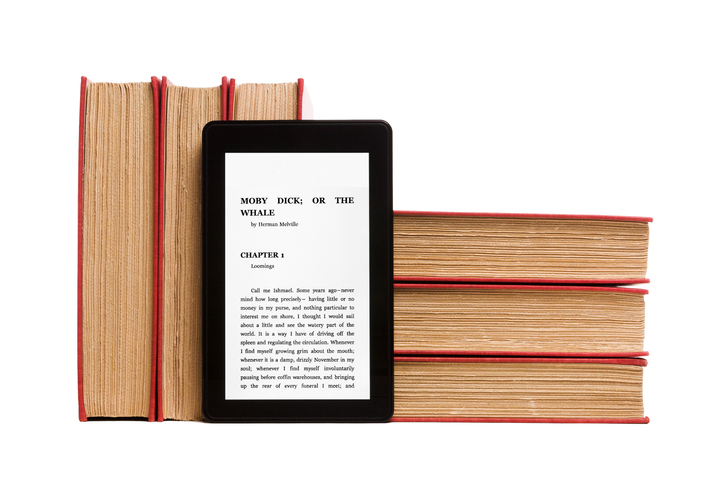

**How we are going to approach it**


- The first step will be to request the Moby Dick HTML file using requests and encoding it to utf-8. Here is the URL to scrape from: https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm


- Next, We'll extract the HTML and create a BeautifulSoup object using an HTML parser to get the text.
- Following that, we'll initialize a regex tokenizer object tokenizer using nltk.tokenize.RegexpTokenizer to keep only alphanumeric text, assigning the results to tokens.

- We'll transform the tokens into lowercase, removing English stop words, and saving the results to **words_no_stop**.

- Finally, we'll initialize a Counter object and find the ten most common words, saving the result to **top_ten** and printing to see what they are.

In [3]:
# Import and download packages
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
nltk.download('stopwords')

# Get the Moby Dick HTML
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Set the correct text encoding of the HTML page
r.encoding = 'utf-8'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Extract the HTML from the request object
html = r.text

# Print the first 2000 characters in html
print(html[0:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

In [5]:
# Create a BeautifulSoup object from the HTML
html_soup = BeautifulSoup(html, "html.parser")

# Get the text out of the soup
moby_text = html_soup.get_text()

# Create a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenize the text
tokens = tokenizer.tokenize(moby_text)

In [12]:
# Create a list called words containing all tokens transformed to lowercase
words = [token.lower() for token in tokens]

# Print out the first eight words
words[:10]

['moby',
 'dick',
 'or',
 'the',
 'whale',
 'by',
 'herman',
 'melville',
 'the',
 'project']

In [11]:
# Get the English stop words from nltk
stop_words = nltk.corpus.stopwords.words('english')

# Print out the first eight stop words
stop_words[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [10]:
# Create a list words_ns containing all words that are in words but not in stop_words
words_no_stop = [word for word in words if word not in stop_words]

# Print the first five words_no_stop to check that stop words are gone
words_no_stop[:10]

['moby',
 'dick',
 'whale',
 'herman',
 'melville',
 'project',
 'gutenberg',
 'ebook',
 'moby',
 'dick']

In [14]:
# Initialize a Counter object from our processed list of words
count = Counter(words_no_stop)

# Store ten most common words and their counts as top_ten
top_ten = count.most_common(20)

# Print the top ten words and their counts
print(top_ten)

[('whale', 1246), ('one', 925), ('like', 647), ('upon', 568), ('man', 527), ('ship', 519), ('ahab', 517), ('ye', 473), ('sea', 455), ('old', 452), ('would', 432), ('though', 384), ('head', 348), ('yet', 345), ('boat', 337), ('long', 334), ('time', 334), ('captain', 329), ('still', 312), ('chapter', 308)]


<Axes: xlabel='Words'>

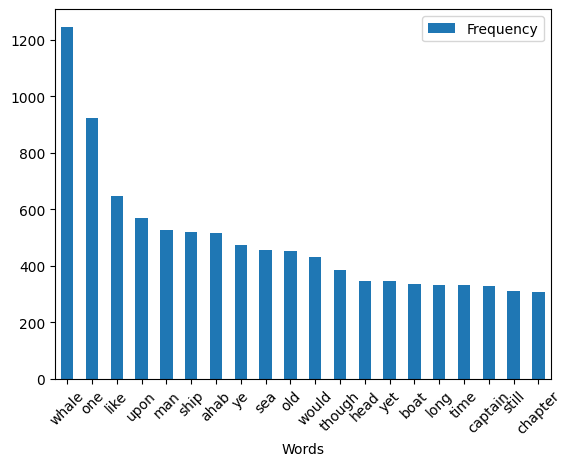

In [23]:
top_ten_words = [word[0] for word in top_ten]
top_ten_words

import pandas as pd

top_20_df = pd.DataFrame( top_ten, columns= ['Words', 'Frequency'])
top_20_df.sort_values(by='Frequency', ascending=False).plot.bar(x='Words', y='Frequency', rot= 45)

The most used word - **whale**, appeared a whopping 1246 times in the text.

In [ ]:
# The End !